In [1]:
import os
from os import chdir, listdir, system, popen
import pandas as pd
import numpy as np

FILEPATH = 'C:\\Users\\shinj\\OneDrive\\Desktop\\ShinjithaDesktop\\NLP\CUILESS\\cuiless\\semeval_2015_task14_updated\\data\\devel\\discharge'
files = listdir(FILEPATH)

In [2]:
F1 = "C:\\Users\\Shinj\\OneDrive\\Desktop\\UABinf\\drugs.xlsx"
F2 = "C:\\Users\\Shinj\\OneDrive\\Desktop\\UABinf\\diseases_cui.xlsx"

drugs = pd.read_excel(F1, header=None)
drugs.columns = ['DrugSynonyms_CDR','Code']

diseases = pd.read_excel(F2, header=None)
diseases.columns = ['CUI']

<h1> Diseases </h1>

In [3]:
CUI_dataframe = pd.read_pickle("./CUI_dataframe.pkl")
result = diseases.join(CUI_dataframe.set_index('CUI'), on='CUI')
sem_eval_CUI_count = result.groupby(by="CUI").count()
sem_eval_CUI_count

,Disease
CUI,
C0000737,21
C0000833,7
C0000921,14
C0001122,6
C0001125,6
...,...
C3164070,2
C3164530,3
C3164874,3


In [4]:
Def_dataframe = pd.read_pickle("./Def_dataframe.pkl")
result = diseases.join(Def_dataframe.set_index('CUI'), on='CUI')
sem_eval_def = result.groupby(by="CUI").count()
sem_eval_def

,DEF
CUI,
C0000737,6
C0000833,6
C0000921,2
C0001122,6
C0001125,4
...,...
C3164070,0
C3164530,0
C3164874,0


In [5]:
result_Diseases = pd.concat([sem_eval_CUI_count, sem_eval_def], axis=1, sort=False)
result_Diseases['DEF'] = result_Diseases['DEF'].fillna(0)
result_Diseases['Disease'] = result_Diseases['Disease'].fillna(0)
# result['Drug'] = result['Drug'].fillna(0)
result_Diseases

,Disease,DEF
CUI,,
C0000737,21,6
C0000833,7,6
C0000921,14,2
C0001122,6,6
C0001125,6,4
...,...,...
C3164070,2,0
C3164530,3,0
C3164874,3,0


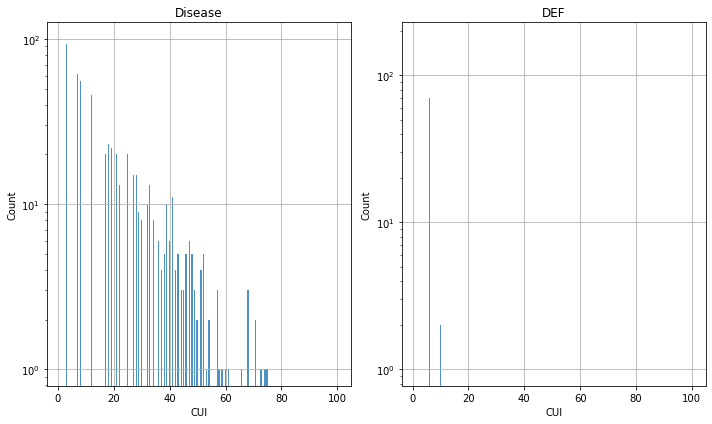

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

bins = np.logspace(0,2,500)
axs = result_Diseases.hist(bins=bins, figsize=(10,6), alpha=0.8, label='Value', linewidth=2)
for ax in axs.ravel():
    ax.set_yscale('log')
#     ax.set_xscale('log')
    ax.set_xlabel('CUI')
    ax.set_ylabel('Count')

plt.gcf().tight_layout()
plt.show()

<h1> Drugs </h1>


In [7]:
# drugs_name = pd.DataFrame(res4)
# drugs_name.columns = ['CUI', 'DrugsynonymsUMLS', 'TUI', 'Code', 'SAB']
# drugs_name = drugs_name.drop(columns=['CUI','TUI', 'SAB'])
# drugs_name.to_pickle("./drugs_name.pkl")
drugs_name = pd.read_pickle("./drugs_name.pkl")
# drugs_name

In [8]:
sem_eval_drug = drugs.join(drugs_name.set_index('Code'), on='Code')
sem_eval_drug = sem_eval_drug.groupby(by="Code").count()
sem_eval_drug.to_pickle("./sem_eval_drug.pkl")
sem_eval_drug = pd.read_pickle("./sem_eval_drug.pkl")
sem_eval_drug = sem_eval_drug.reset_index()
sem_eval_drug 

,Code,DrugSynonyms_CDR,DrugsynonymsUMLS
0,C001335,3,3
1,C002744,6,6
2,C003636,8,8
3,C004479,3,3
4,C004504,6,6
...,...,...,...
147,C562694,1,0
148,C563897,1,0
149,C564088,1,0
150,C565222,1,0


In [9]:
# drugsdef_name = pd.DataFrame(res3)
# drugsdef_name.columns = ['CUI', 'DrugDefUMLS', 'SAB', 'Code', 'TUI']
# drugsdef_name = drugsdef_name.drop(columns=['CUI','TUI', 'SAB'])
# drugsdef_name.to_pickle("./drugsdef_name.pkl")
drugsdef_name = pd.read_pickle("./drugsdef_name.pkl")
# drugsdef_name

In [10]:
sem_eval_drug_def = drugs.join(drugsdef_name.set_index('Code'), on='Code')
sem_eval_drug_def = sem_eval_drug_def.groupby(by="Code").count()
sem_eval_drug_def.to_pickle("./sem_eval_drug_def.pkl")
sem_eval_drug_def = pd.read_pickle("./sem_eval_drug_def.pkl")
sem_eval_drug_def = sem_eval_drug_def.reset_index()
sem_eval_drug_def

,Code,DrugSynonyms_CDR,DrugDefUMLS
0,C001335,1,0
1,C002744,1,1
2,C003636,1,0
3,C004479,1,0
4,C004504,1,0
...,...,...,...
147,C562694,1,0
148,C563897,1,0
149,C564088,1,0
150,C565222,1,0


In [11]:
drugs_semeval = drugs.groupby(by='DrugSynonyms_CDR').agg('count')
drugs_semeval = drugs_semeval.rename(columns={"Code": "Code_count"})
drugs_semeval = drugs_semeval.reset_index()
drugs_semeval

,DrugSynonyms_CDR,Code_count
0,1,46
1,2,24
2,3,19
3,4,15
4,5,5
5,6,9
6,7,13
7,8,4
8,9,4
9,10,5


In [12]:
sem_eval_drug = pd.read_pickle("./sem_eval_drug.pkl")
sem_eval_drug_UMLS = sem_eval_drug.drop(columns=['DrugSynonyms_CDR'])
sem_eval_drug_UMLS = sem_eval_drug_UMLS.reset_index()
sem_eval_drug_UMLS = sem_eval_drug_UMLS.groupby(by='DrugsynonymsUMLS').agg('count')
sem_eval_drug_UMLS = sem_eval_drug_UMLS.rename(columns={"Code": "Code_count"})
sem_eval_drug_UMLS = sem_eval_drug_UMLS.reset_index()
sem_eval_drug_UMLS

,DrugsynonymsUMLS,Code_count
0,0,53
1,1,3
2,2,13
3,3,14
4,4,13
5,5,14
6,6,14
7,7,7
8,8,6
9,9,1


In [13]:
sem_eval_drug = pd.read_pickle("./sem_eval_drug_def.pkl")
sem_eval_drugdef_UMLS = sem_eval_drug.drop(columns=['DrugSynonyms_CDR'])
sem_eval_drugdef_UMLS = sem_eval_drugdef_UMLS.reset_index()
sem_eval_drugdef_UMLS = sem_eval_drugdef_UMLS.groupby(by='DrugDefUMLS').agg('count')
sem_eval_drugdef_UMLS = sem_eval_drugdef_UMLS.rename(columns={"Code": "Code_count(UMLS)"})
sem_eval_drugdef_UMLS = sem_eval_drugdef_UMLS.reset_index()
sem_eval_drugdef_UMLS

,DrugDefUMLS,Code_count(UMLS)
0,0,136
1,1,8
2,2,4
3,3,3
4,5,1
